In [10]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [11]:
df = pd.read_json("exps.jsonl", lines=True)
print(len(df))
df.head()

392


,id,name,params.dataset.path,params.dataset.name,params.dataset.split,params.qa.model,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,...,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique,params.qa.instruction
0,89ceb09a69f6dd22d587ad0e1d1161a7f31b166d,coxal-eyas,bdsaglam/musique,answerable,validation,llama-3.3-70b-tgi,1.0,cok/adapted.txt,cq.txt,manual/cok.json,...,673,102.307578,30.530511,45,83.0,94.0,114.00,239,COK,cok/adapted:cq:manual/cok
1,569fe899f90c8bdaf47866bbb36fc24c88f4925c,sulfa-lame,bdsaglam/musique,answerable,validation,llama-3.3-70b-tgi,0.5,cot/format-thought.txt,cq.txt,manual/cot.json,...,716,94.681564,60.827044,29,59.0,80.0,112.25,873,COT,cot/format-thought:cq:manual/cot
2,98498237a46b9b473706d7f773a27e67e30523d9,wacky-ciao,bdsaglam/musique,answerable,validation,llama-3.3-70b-tgi,0.5,cte/format-triples-ere-few.txt,cq.txt,manual/cte-triples.json,...,686,52.836735,21.162000,18,39.0,48.0,61.00,177,CTE,cte/format-triples-ere-few:cq:manual/cte-triples
3,288b4a6bb49a305006dc7f891cc0c52cc0b77d0b,tarry-bani,bdsaglam/musique,answerable,validation,llama-3.3-70b-tgi,0.5,cte/format-triples-few.txt,cq.txt,manual/cte-triples.json,...,643,52.905132,26.209948,16,36.0,46.0,61.50,228,CTE,cte/format-triples-few:cq:manual/cte-triples
4,e3ed6981ac0d21340a3b5eca1e92696a1e7fdd0a,keyed-brig,bdsaglam/musique,answerable,validation,llama-3.3-70b-tgi,0.0,cot/format-thought.txt,cq.txt,manual/cot.json,...,709,92.279267,70.008643,23,52.0,75.0,104.00,839,COT,cot/format-thought:cq:manual/cot


In [12]:
param_cols = [col for col in df.columns if col.startswith("params.")]
metric_cols = ['metrics.exact_match', 'metrics.f1']
df.drop(
    columns=[
        "id",
        "params.dataset.path",
        "params.dataset.name",
        "params.dataset.split",
    ],
    inplace=True,
)

In [13]:
target_param_cols = [
    "params.qa.model",
    "params.qa.temperature",
    "params.qa.technique",
    "params.qa.instruction",
    "params.qa.n_shot",
]
df = df.sort_values(target_param_cols + ["params.run"])
df.reset_index(drop=True, inplace=True)
df.head()

,name,params.qa.model,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,params.run,metrics.exact_match,...,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique,params.qa.instruction
0,above-yegg,deepseek-r1-llama-70b-tgi,0.0,direct/format-few.txt,cq.txt,empty.json,0,1,1,0.571783,...,733,1114.474761,1900.507203,134,311.00,422.0,895.00,8287,REASONING,direct/format-few:cq:empty
1,robed-scup,deepseek-r1-llama-70b-tgi,0.0,direct/format-few.txt,cq.txt,empty.json,0,1,2,0.570956,...,724,1157.750000,1961.936778,146,315.00,438.5,925.75,8120,REASONING,direct/format-few:cq:empty
2,amort-taro,deepseek-r1-llama-70b-tgi,0.0,direct/format-few.txt,cq.txt,empty.json,0,1,3,0.572611,...,720,1130.566667,1905.580668,136,309.75,436.0,945.25,8176,REASONING,direct/format-few:cq:empty
3,fishy-rise,deepseek-r1-llama-70b-tgi,0.0,empty.txt,icq-format.txt,empty.json,0,1,1,0.573024,...,740,1029.017568,1870.958700,144,289.75,385.0,733.75,8447,REASONING,empty:icq-format:empty
4,bonny-pond,deepseek-r1-llama-70b-tgi,0.0,empty.txt,icq-format.txt,empty.json,0,1,2,0.566405,...,745,979.285906,1772.399007,126,290.00,396.0,725.00,8132,REASONING,empty:icq-format:empty


In [14]:
avg_df = (
    df.groupby(target_param_cols)[["name", *metric_cols]]
    .agg({"name": tuple, "metrics.exact_match": "mean", "metrics.f1": "mean"})
    .reset_index()
)
# find the rows with max f1 score for each technique group
max_f1_rows = avg_df.groupby("params.qa.technique")["metrics.f1"].idxmax()
best_df = avg_df.loc[
    max_f1_rows, ["name"] + target_param_cols + metric_cols[:2]
].sort_values("metrics.f1", ascending=False)
best_df

,name,params.qa.model,params.qa.temperature,params.qa.technique,params.qa.instruction,params.qa.n_shot,metrics.exact_match,metrics.f1
24,"(angry-syce, blown-umbo, ortho-zack)",llama-3-70b-tgi,0.0,COK,cok/adapted:cq:manual/cok,1,0.633016,0.745424
30,"(still-wens, unapt-pope, typic-berk)",llama-3-70b-tgi,0.0,CTE,cte/format-triples-ere-few:cq:manual/cte-triples,1,0.624604,0.740257
26,"(washy-boor, loath-stir, loved-tape)",llama-3-70b-tgi,0.0,COT,cot/format-thought:cq:manual/cot,1,0.604468,0.718662
22,"(yolky-clay, privy-impi, bushy-zoea)",llama-3-70b-tgi,0.0,CCOT,ccot/format-thought:cq:manual/ccot,1,0.604330,0.717449
2,"(alpha-mice, shoal-maya, cheek-yegg)",deepseek-r1-llama-70b-tgi,0.5,REASONING,direct/format-few:cq:empty,0,0.578679,0.714144
49,"(kaput-zoea, losel-orle, godly-fish)",llama-3-70b-tgi,0.5,DIRECT,direct/format-few:cq:manual/direct,1,0.584333,0.702896


In [15]:
def plot_heatmap(df, metric_col):
    instructions = df["instruction"].unique()
    n = len(instructions)
    n_cols = 2
    n_rows = (n + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 8, n_rows * 6))

    vmin = df[metric_col].min()
    vmax = df[metric_col].max()

    for ax, instruction in zip(axes.flatten(), instructions):
        subset_df = df[df["instruction"] == instruction]
        pivot_table = subset_df.pivot_table(
            values=metric_col,
            index="params.qa.temperature",
            columns="params.qa.n_shot",
            aggfunc="mean",
        )
        sns.heatmap(
            pivot_table,
            annot=True,
            fmt=".3f",
            cmap="YlGnBu",
            ax=ax,
            yticklabels=True,
            vmin=vmin,
            vmax=vmax
        )
        ax.set_title(instruction)
        ax.set_xlabel("Number of Few-Shot Examples")
        ax.set_ylabel("Temperature")
        ax.invert_yaxis()

    # Remove any empty subplots
    for ax in axes.flatten()[n:]:
        fig.delaxes(ax)

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.2, hspace=0.2)  # Add padding between plots

In [16]:
def compare_models_grid(df):
    instructions = df["params.qa.instruction"].unique()
    models = df["params.qa.model"].unique()
    n = len(instructions)
    n_cols = 2
    n_rows = (n + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 8, n_rows * 6))

    # Define a more distinct color palette and map each model to a specific color
    palette = sns.color_palette("colorblind", len(models))
    model_colors = dict(zip(models, palette))

    for ax, instruction in zip(axes.flatten(), instructions):
        subset_df = df[df["params.qa.instruction"] == instruction]
        pivot_table = subset_df.pivot_table(
            values="metrics.f1",
            index="params.qa.temperature",
            columns="params.qa.model",
            aggfunc="mean",
        )
        pivot_table.plot(
            title=f"{instruction}",
            xlabel="Temperature",
            ylabel="F1 Score",
            style="o-",
            ax=ax,
            color=[model_colors[model] for model in pivot_table.columns]
        )
        ax.set_ylim(0, 1)  # Set y-axis limits

    # Remove any empty subplots
    for ax in axes.flatten()[n:]:
        fig.delaxes(ax)

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.2, hspace=0.4)  # Add padding between plots
    plt.show()


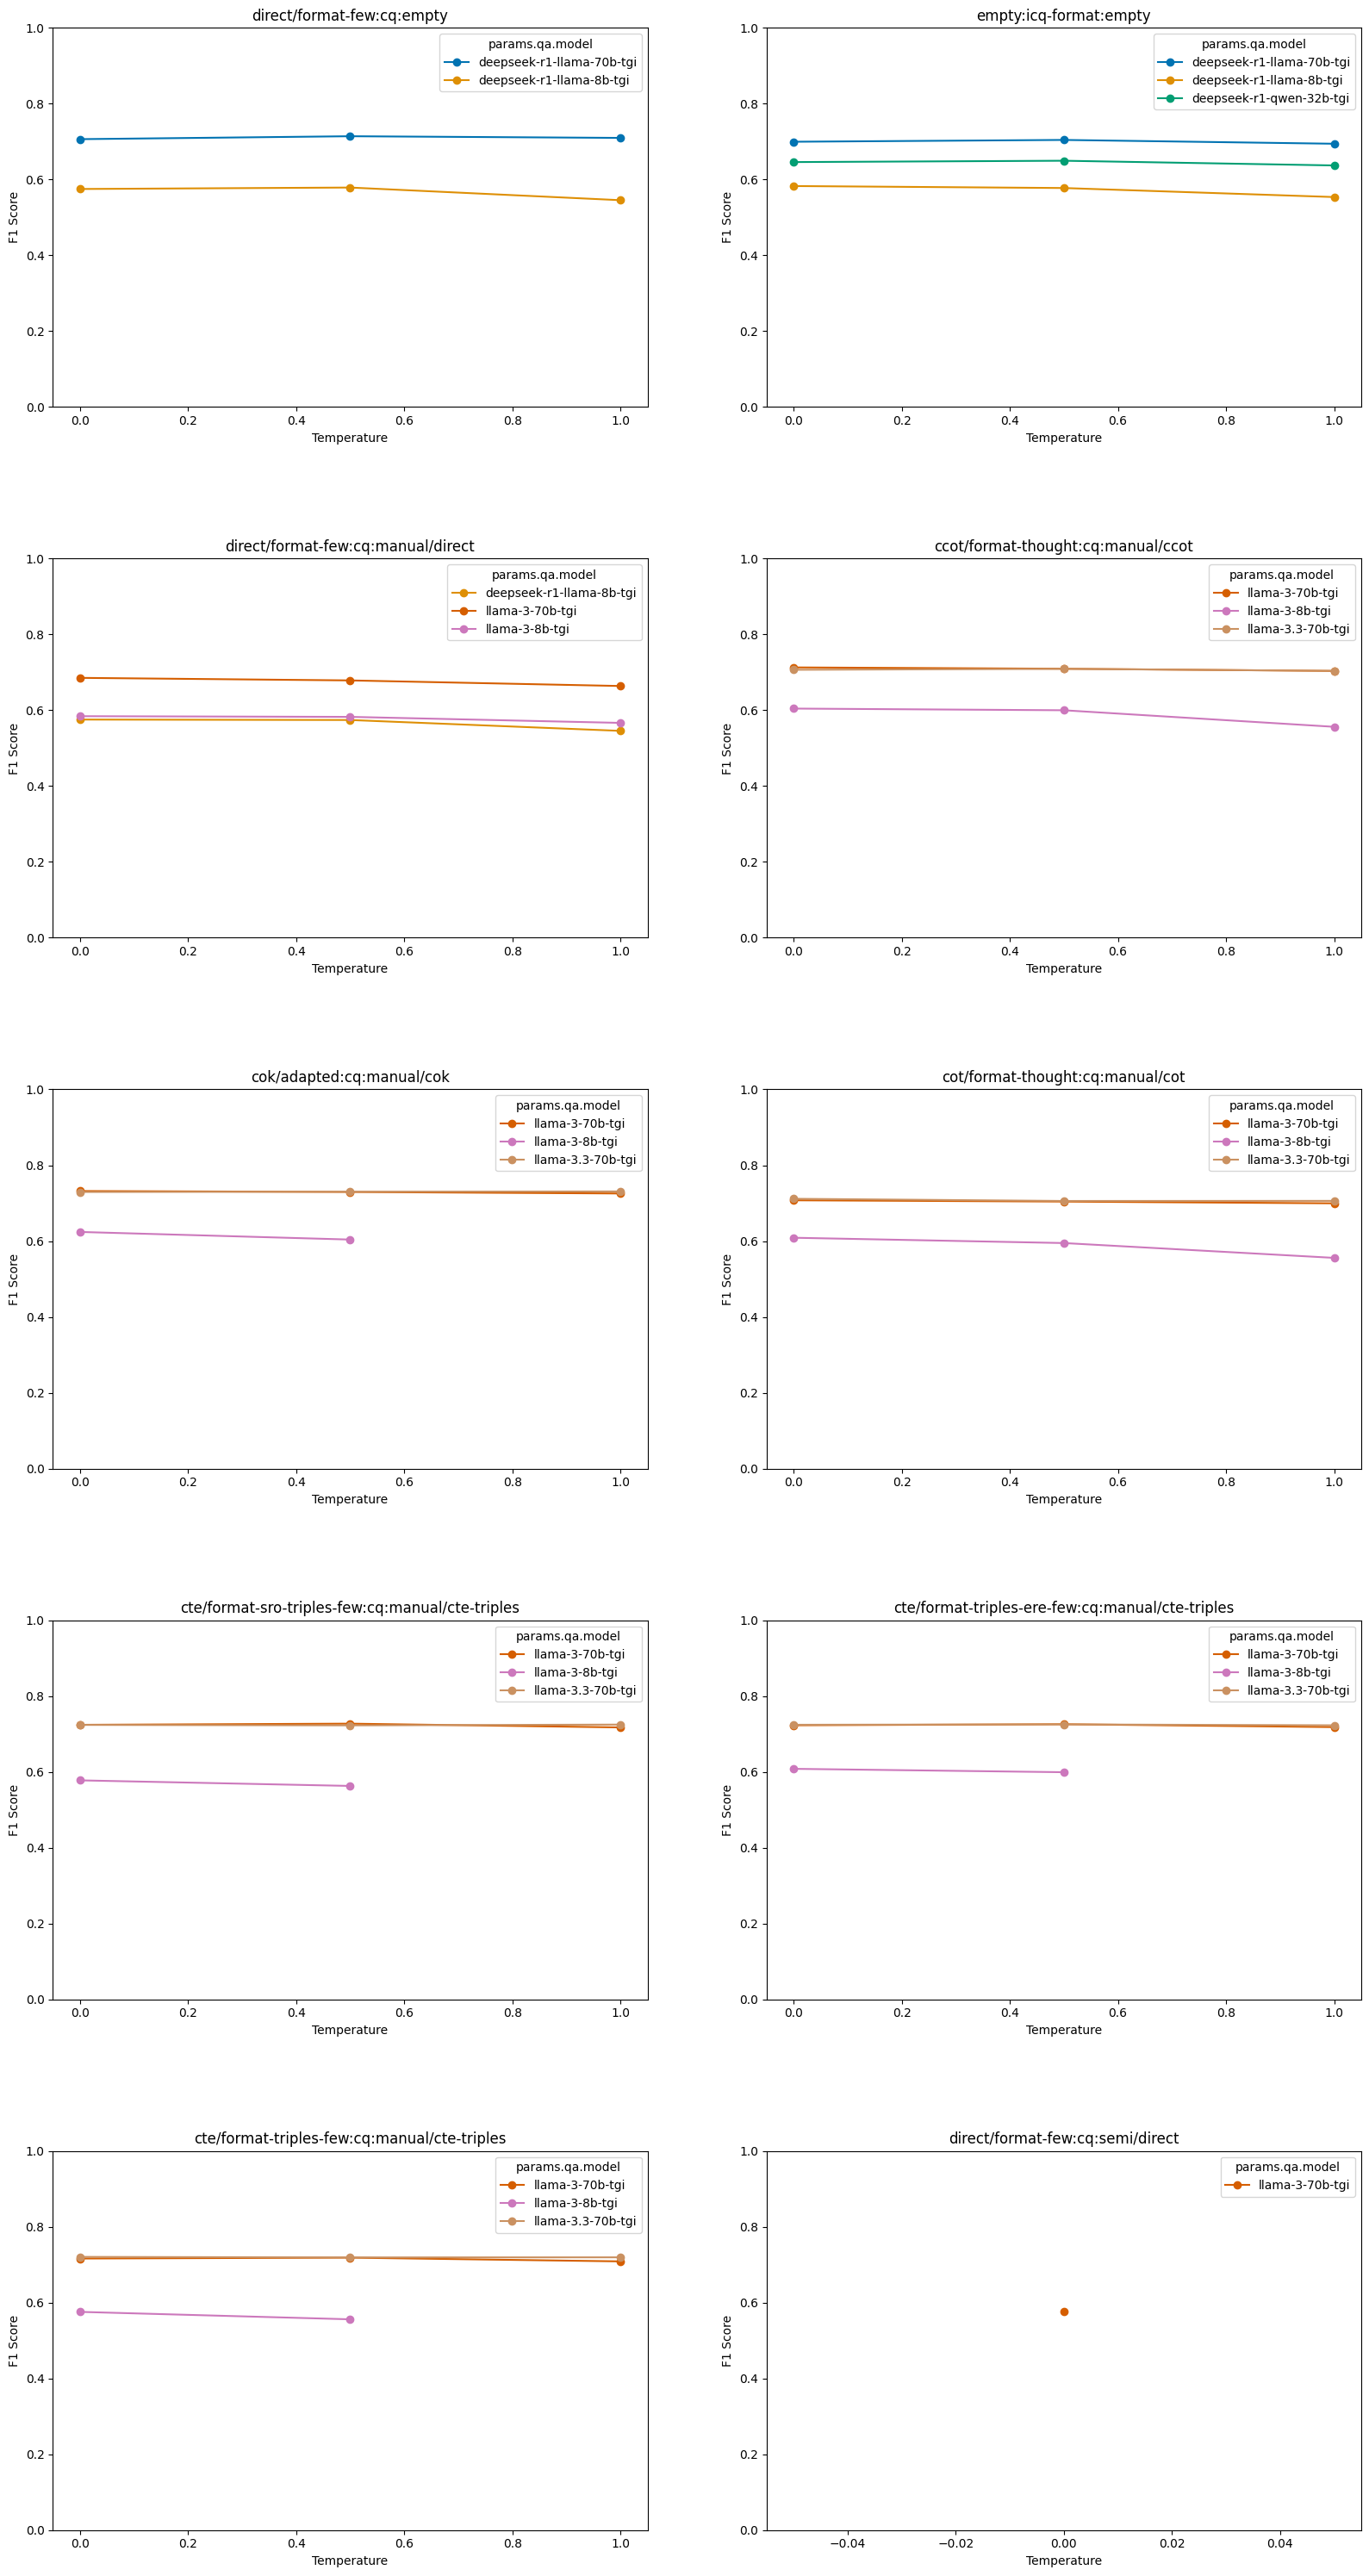

In [17]:
compare_models_grid(df[df['params.qa.n_shot']==0])

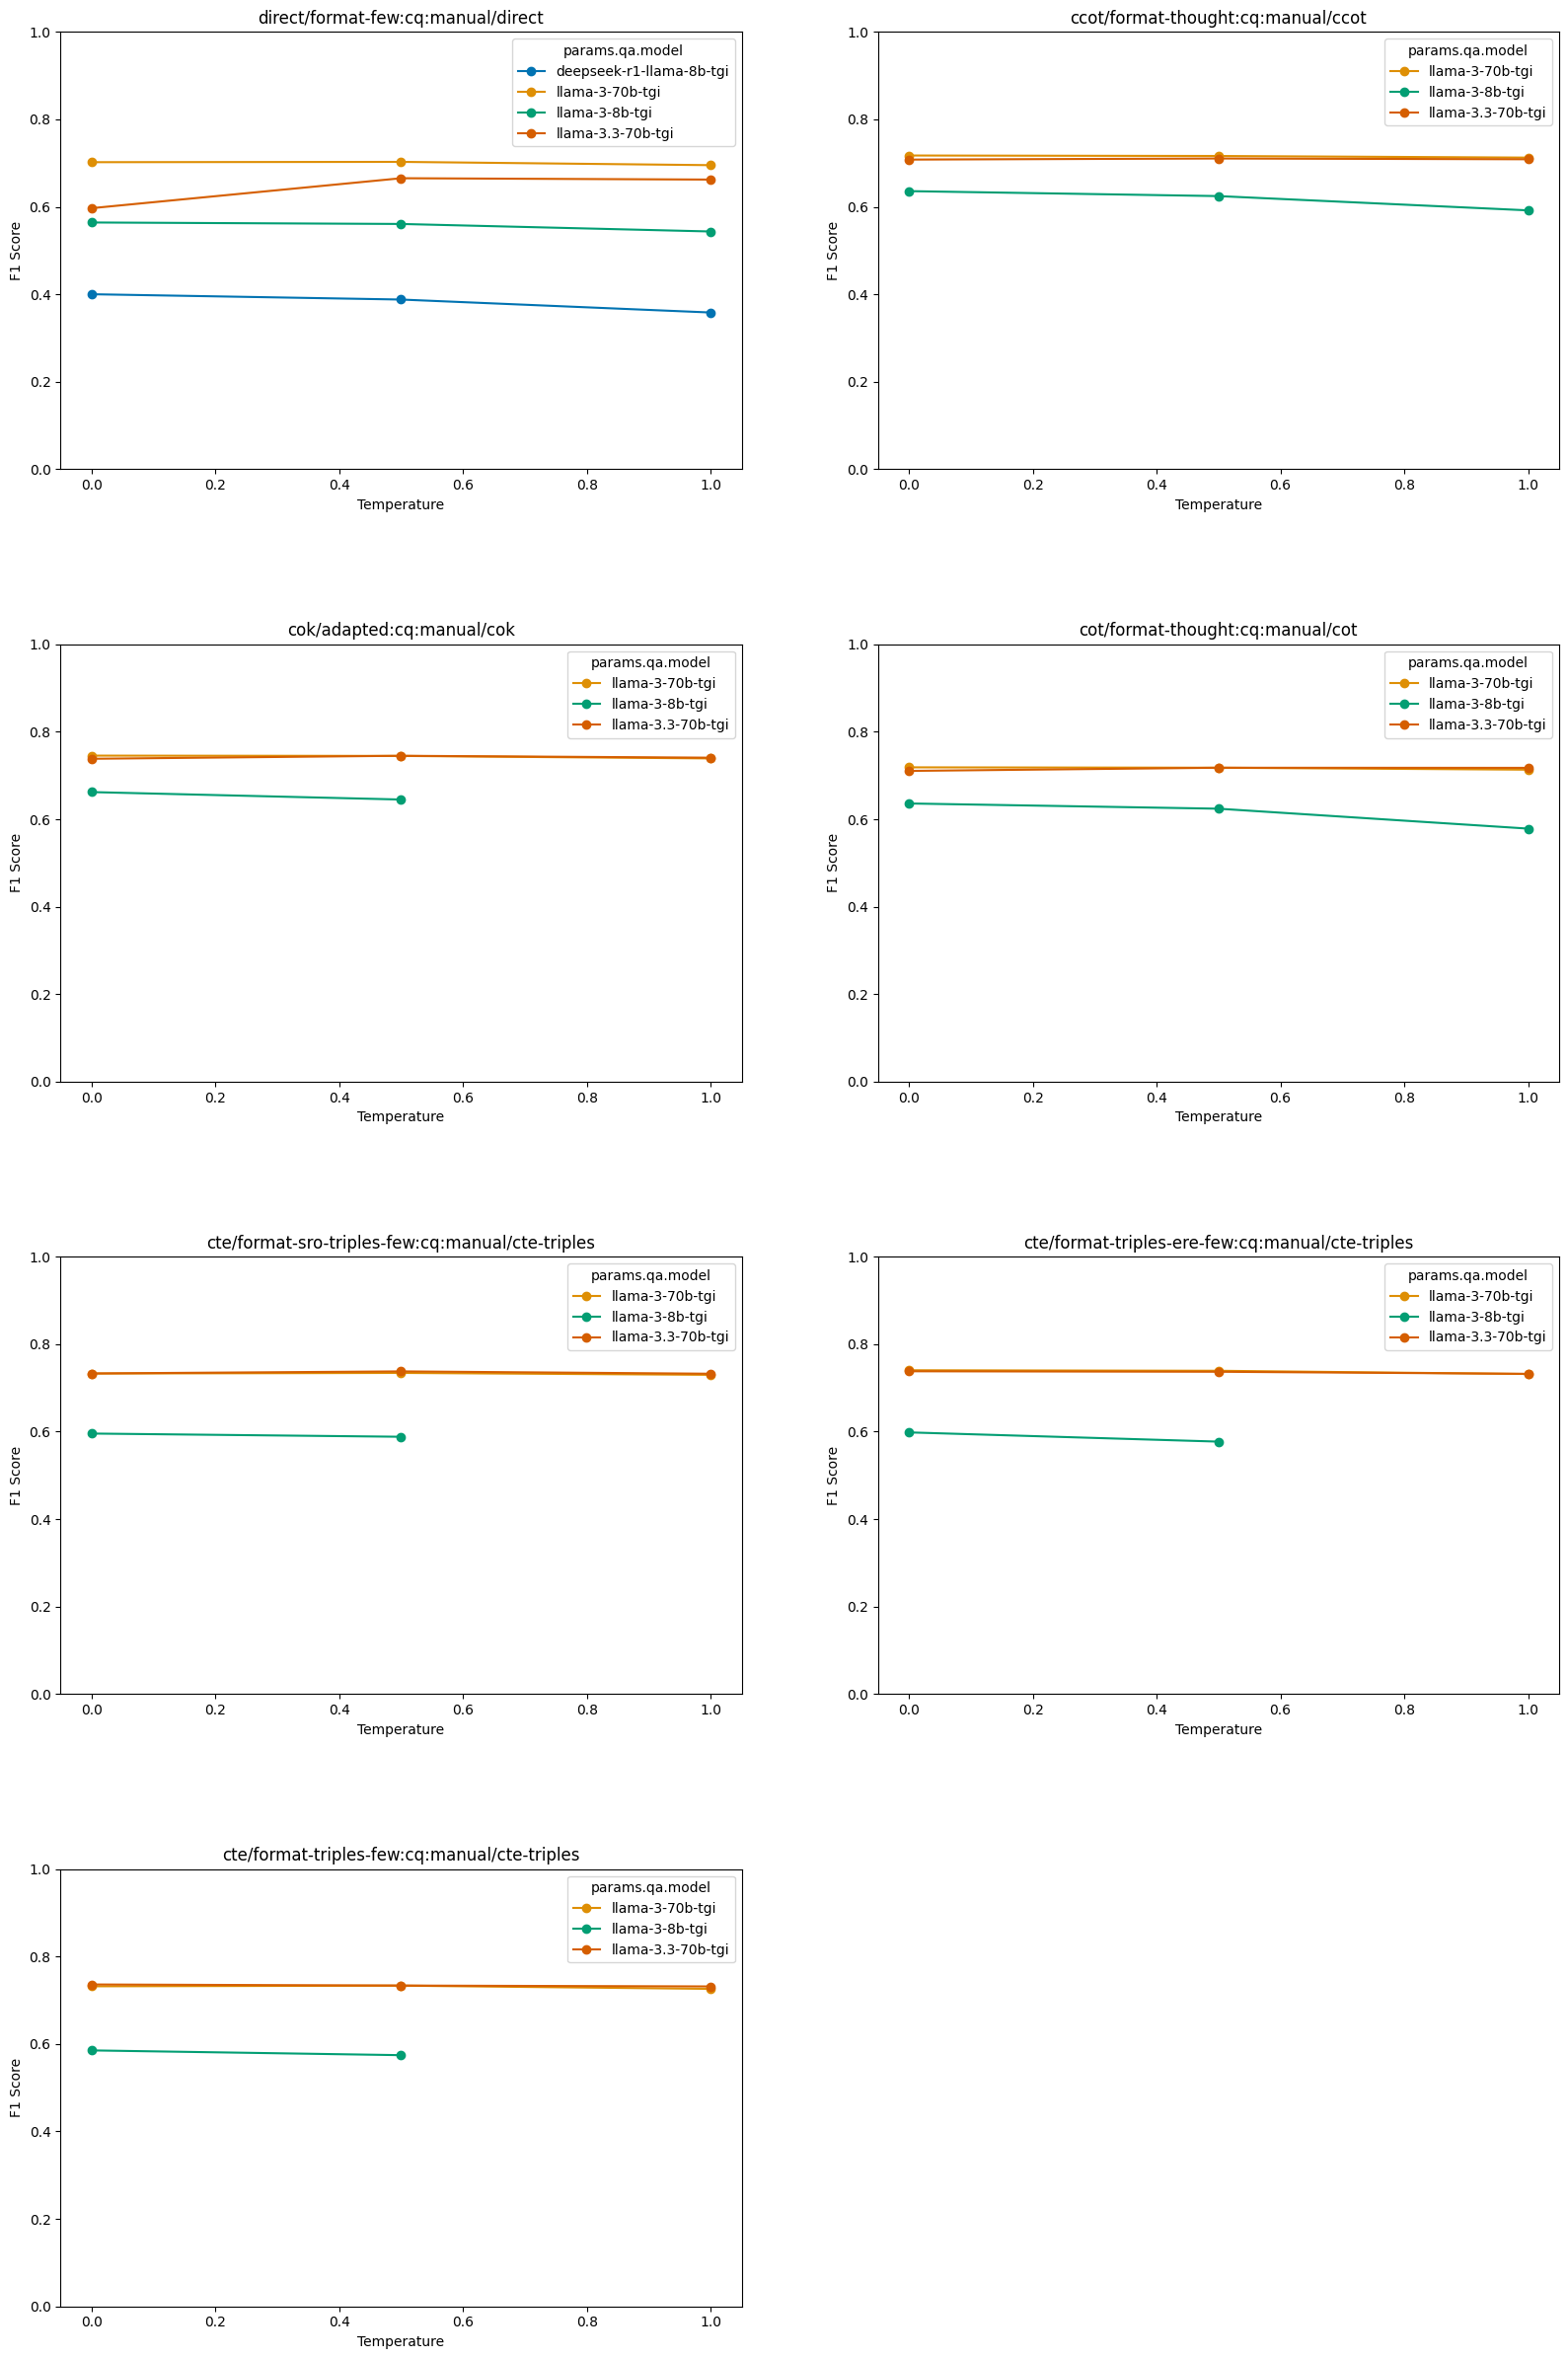

In [18]:
compare_models_grid(df[df['params.qa.n_shot']==1])